In [8]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import cmocean
import matplotlib.pyplot as plt

In [12]:
ds = argo_loader.region([-75, -45, 20, 30, 0, 10, '2011-01-01', '2011-06']).to_xarray()

In [13]:
ds_profiles = ds.argo.point2profile()

In [ ]:
# Select certain N_LEVEL
temp_plot = ds_profiles.isel(N_LEVELS = 0)

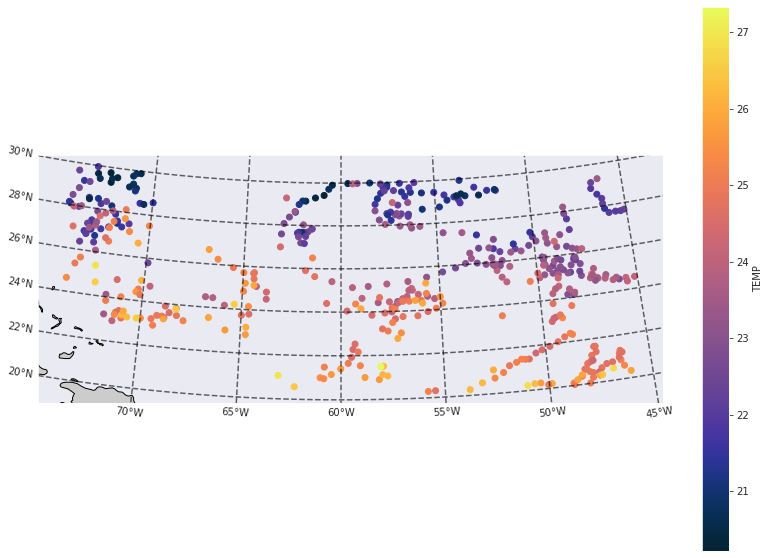

In [14]:
fig = plt.figure(figsize=(14,10))

# Layers and projections
proj = ccrs.LambertConformal(central_longitude = -60, central_latitude = 25)
cmap = cmocean.cm.thermal #setting colormap
ax = plt.axes(projection = proj)

# Plot
temp_plot.plot.scatter(x='LONGITUDE', y='LATITUDE', hue='TEMP', cmap = cmap, transform = ccrs.PlateCarree())
coast_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='k', facecolor='0.8')
ax.add_feature(coast_50m)

# Gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False,
                  linewidth=1.5, color='black', alpha=0.6, linestyle='--')
gl.right_labels = False
gl.top_labels = False
gl.xlocator = mticker.FixedLocator([-70,-65,-60,-55,-50,-45])
plt.show()